In [ ]:
"""
Este programa faz analise inicial dos dados do ENEM 2023

Funcionalidades:
- faz a leitura dos dados do ENEM 2023 limpos no arquivo 'microdados_tratado.csv'01_analise_inicial
- Recupera os dtypes de cada colunas do arquivo 'dtypes.json'
- cria os seguintes dicionarios para mapear os dados: 
    - faixa etária: coluna TP_FAIXA_ETARIA
    - sexo: coluna TP_SEXO
    - estado civil: coluna TP_ESTADO_CIVIL
    - cor/raça: coluna TP_COR_RACA
    - nacionalidade: coluna TP_NACIONALIDADE
    - situação de conclusão do ensino médio: coluna TP_SITUACAO_CONCLUSAO
    - ano de conclusão do ensino médio: coluna TP_ANO_CONCLUIU
    - tipo de escola do ensino médio: coluna TP_ESCOLA
    - tipo de instiuição que concluiu ou concluirá o EM: coluna TP_ENSINO
    - candidato é treineiro: coluna IN_TREINEIRO
    - dependência administrativa da escola: coluna TP_DEPENDENCIA_ADM_ESC
    - localização da escola: coluna TP_LOCALIZACAO_ESC
    - sigla da UF da escola: coluna SG_UF_PROVA

- para cada dicionário foi plotado um histograma para visualização dos dados

"""

In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Criando um dicionário para mapear os valores da coluna 'TP_FAIXA_ETARIA'
faixa_etaria = {
    1: '< 17',
    2: '17',
    3: '18',
    4: '19',
    5: '20',
    6: '21',
    7: '22',
    8: '23',
    9: '24',
    10: '25',
    11: '26 < 30',
    12: '31 < 35',
    13: '36 < 40',
    14: '41 < 45',
    15: '46 < 50',
    16: '51 < 55',
    17: '56 < 60',
    18: '61 < 65',
    19: '66 < 70',
    20: '> 70'
}


# Criando um dicionário para mapear os valores da coluna 'TP_SEXO'
sexo = {
    0: 'Feminino',
    1: 'Masculino',
}

# Criando um dicionário para mapear os valores da coluna 'TP_ESTADO_CIVIL'
estado_civil = {
    0: 'Não informado',
    1: 'Solteiro(a)',
    2: 'Casado(a)/Mora com companheiro(a)',
    3: 'Divorciado(a)/Desquitado(a)/Separado(a)',
    4: 'Viúvo(a)'
}

# Criando um dicionário para mapear os valores da coluna 'TP_COR_RACA'
cor_raca = {
    0: 'Não declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena',
}

# Criando um dicionário para mapear os valores da coluna 'TP_NACIONALIDADE'
nacionalidade = {
    0: 'Não informado',
    1: 'Brasileiro(a)',
    2: 'Brasileiro(a) Naturalizado(a)',
    3: 'Estrangeiro(a)',
    4: 'Brasileiro(a) Nato(a), nascido(a) no exterior'
}

# Criando um dicionário para mapear os valores da coluna 'TP_ST_CONCLUSAO'
st_conclusao = {
    1: 'Já concluí o Ensino Médio',
    2: 'Estou cursando e concluirei o Ensino Médio em 2023',
    3: 'Estou cursando e concluirei o Ensino Médio após 2023',
    4: 'Não concluí e não estou cursando o Ensino Médio'
}

# Criando um dicionário para mapear os valores da coluna 'TP_ANO_CONCLUIU'
ano_concluiu = {
    0: 'Não informado',
    1: '2022',
    2: '2021',
    3: '2020',
    4: '2019',
    5: '2018',
    6: '2017',
    7: '2016',
    8: '2015',
    9: '2014',
    10: '2013',
    11: '2012',
    12: '2011',
    13: '2010',
    14: '2009',
    15: '2008',
    16: '2007',
    17: '< 2007'
}

# Criando um dicionário para mapear os valores da coluna 'TP_ESCOLA'
escola = {
    1: 'Não Respondeu',
    2: 'Pública',
    3: 'Privada'
}

# Criando um dicionário para mapear os valores da coluna 'TP_ENSINO'
ensino = {
    -1: 'Desconhecido', # Este valor foi adicionado manualmente. NÃO ESTA PREVISTO NO DATASET ORIGINAL
    1: 'Regular',
    2: 'Educação Especial - Modalidade Substitutiva'
}

# Criando um dicionário para mapear os valores da coluna 'IN_TREINEIRO'
treineiro = {
    0: 'Não',
    1: 'Sim'
}

# Criando um dicionário para mapear os valores da coluna 'TP_DEPENDENCIA_ADM_ESC'
dependencia_adm_esc = {
    -1: 'Desconhecido', # Este valor foi adicionado manualmente. NÃO ESTA PREVISTO NO DATASET ORIGINAL
    1: 'Federal',
    2: 'Estadual',
    3: 'Municipal',
    4: 'Privada'
}

# Criando um dicionário para mapear os valores da coluna 'TP_LOCALIZACAO_ESC'
localizacao_esc = {
    -1: 'Desconhecido', # Este valor foi adicionado manualmente. NÃO ESTA PREVISTO NO DATASET ORIGINAL
    1: 'Urbana',
    2: 'Rural'
}

# Criando um dicionário para mapear os estados do Brasil
uf_brasil = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AP': 'Amapá',
    'AM': 'Amazonas',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PR': 'Paraná',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'SC': 'Santa Catarina',
    'SP': 'São Paulo',
    'SE': 'Sergipe',
    'TO': 'Tocantins',
    'Desconhecido': 'Desconhecido' # Este valor foi adicionado manualmente. NÃO ESTA PREVISTO NO DATASET ORIGINAL
}

In [9]:
#Importação dos arquivo tratado
microdados = pd.read_csv('microdados_tratado.csv', sep=';', encoding='ISO-8859-1')

In [20]:
"""
Leitura do arquivo JSON com os tipos de dados de cada coluna
Atualizar o arquivo JSON com os tipos de dados corretos e otimizados
"""
dtypes = pd.read_json("dtypes.json", typ='series')
microdados = microdados.astype(dtypes)
microdados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933955 entries, 0 to 3933954
Data columns (total 76 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   NU_ANO                  int16   
 1   TP_FAIXA_ETARIA         int8    
 2   TP_SEXO                 bool    
 3   TP_ESTADO_CIVIL         int8    
 4   TP_COR_RACA             int8    
 5   TP_NACIONALIDADE        int8    
 6   TP_ST_CONCLUSAO         int8    
 7   TP_ANO_CONCLUIU         int8    
 8   TP_ESCOLA               int8    
 9   TP_ENSINO               int8    
 10  IN_TREINEIRO            bool    
 11  CO_MUNICIPIO_ESC        int32   
 12  NO_MUNICIPIO_ESC        category
 13  CO_UF_ESC               int8    
 14  SG_UF_ESC               category
 15  TP_DEPENDENCIA_ADM_ESC  int8    
 16  TP_LOCALIZACAO_ESC      int8    
 17  TP_SIT_FUNC_ESC         int8    
 18  CO_MUNICIPIO_PROVA      int32   
 19  NO_MUNICIPIO_PROVA      category
 20  CO_UF_PROVA             int8    
 21  SG_UF_PR

In [30]:
# Criando função para plotar histograma
def plot_histograma(coluna, dicionario, titulo, rotation_bar=0, pad=0):
    # Contando a quantidade de valores de cada tipo
    count = microdados[coluna].value_counts().reindex(dicionario.keys())

    # Criando o histograma
    histograma = count.plot(kind='bar')
    # Adicionando os valores no topo das barras
    for index, value in enumerate(count):
        # parametros do text: x, y, texto, alinhamento horizontal, alinhamento vertical, rotação
        histograma.text(index, value, str(value), ha='center', va='bottom', rotation=rotation_bar)

    # Adicionando os rótulos do eixo x
    histograma.set_xticklabels(dicionario.values(), rotation=90)
    # Adicionando o título ao gráfico
    plt.title(titulo, pad=pad)
    # Exibindo o gráfico
    plt.show()

In [ ]:
# Plotando histogramas para as colunas 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO'
# 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'SG_UF_ESC'

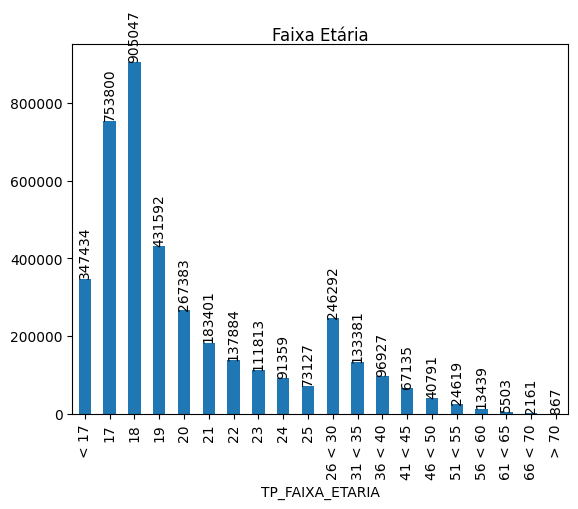

In [27]:
plot_histograma('TP_FAIXA_ETARIA', faixa_etaria, 'Faixa Etária',90)

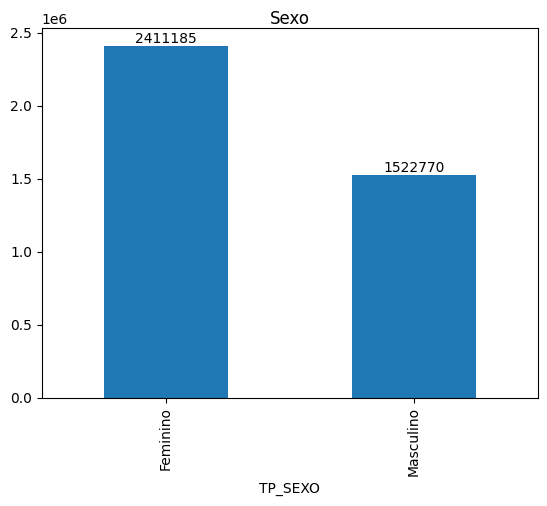

In [23]:
# Plotando histograma para a coluna 'TP_SEXO'
plot_histograma('TP_SEXO', sexo, 'Sexo')

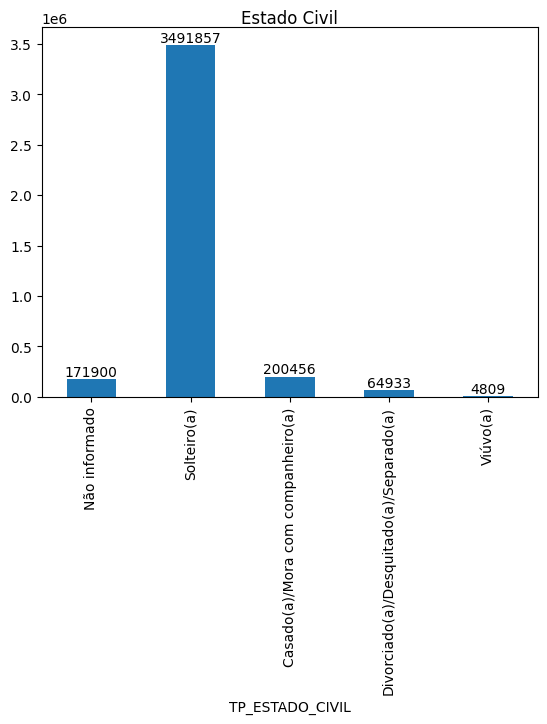

In [24]:
# Plotando histograma para a coluna 'TP_ESTADO_CIVIL'
plot_histograma('TP_ESTADO_CIVIL', estado_civil, 'Estado Civil')

In [ ]:
'''
Questoes a serem explordas:
- distribuição da raça: por estado, por faixa etária, por sexo
- análise proporcional da raça: por estado, por faixa etária, por sexo
'''

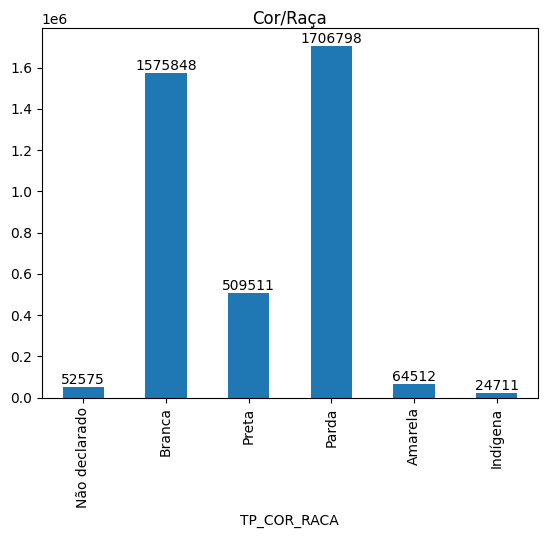

In [25]:
# Plotando histograma para a coluna 'TP_COR_RACA'
plot_histograma('TP_COR_RACA', cor_raca, 'Cor/Raça')

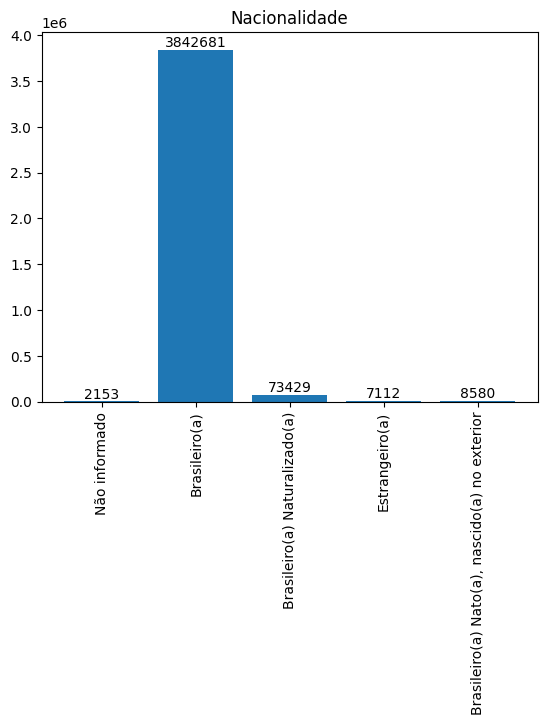

In [82]:
# Plotando histograma para a coluna 'TP_NACIONALIDADE'

plot_histograma('TP_NACIONALIDADE', nacionalidade, 'Nacionalidade')

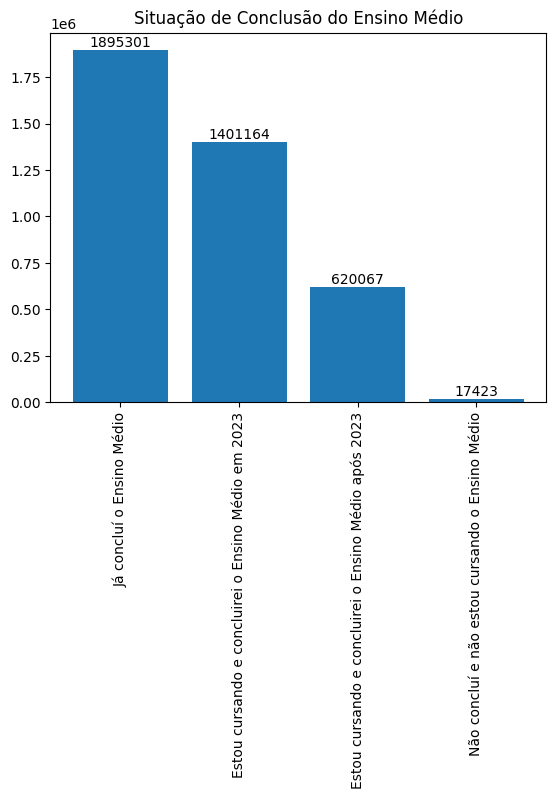

In [83]:
# Plotando histograma para a coluna 'TP_ST_CONCLUSAO'
plot_histograma('TP_ST_CONCLUSAO', st_conclusao, 'Situação de Conclusão do Ensino Médio')


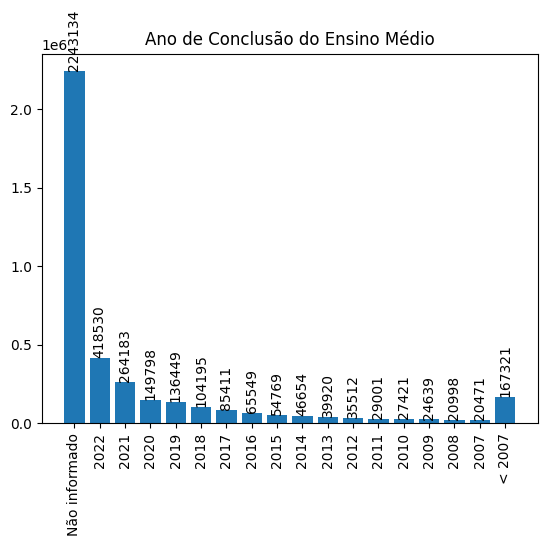

In [84]:
# Plotando histograma para a coluna 'TP_ANO_CONCLUIU'
plot_histograma('TP_ANO_CONCLUIU', ano_concluiu, 'Ano de Conclusão do Ensino Médio', 90)

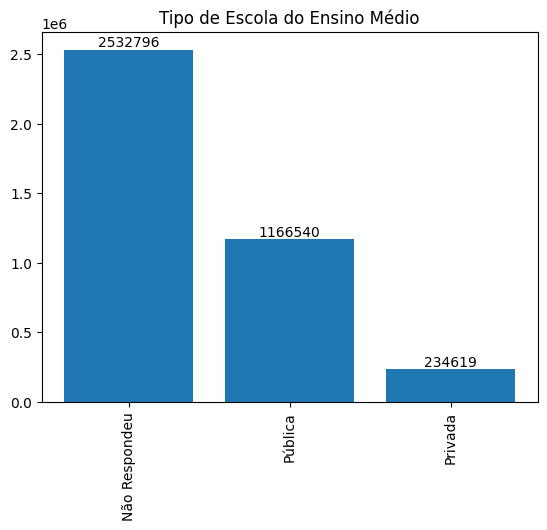

In [85]:
# Plotando histograma para a coluna 'TP_ESCOLA'
plot_histograma('TP_ESCOLA', escola, 'Tipo de Escola do Ensino Médio')

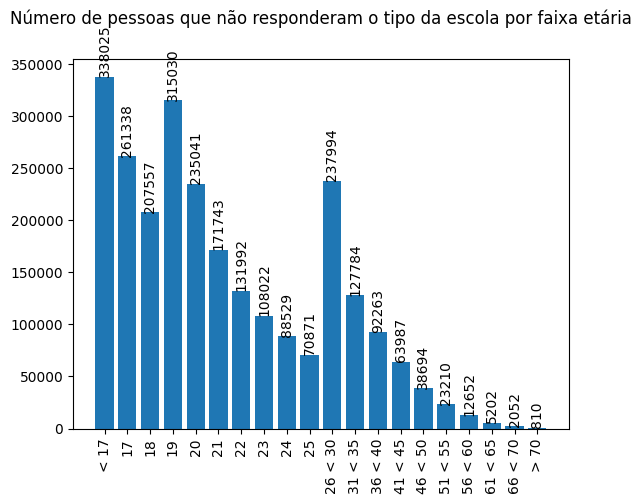

In [86]:
# Plotando um histograma do número de pessoas que não responderam o tipo da escola por faixa etária
escola_count = [0] * 20
for i in range(20):
    escola_count[i] = microdados[(microdados['TP_ESCOLA'] == 1) & (microdados['TP_FAIXA_ETARIA'] == i + 1)].shape[0]

for i, count in enumerate(escola_count):
    plt.text(i, count, str(count), ha='center', va='bottom', rotation=90)

plt.bar(faixa_etaria.values(), escola_count)
plt.title('Número de pessoas que não responderam o tipo da escola por faixa etária', pad=25)
plt.xticks(rotation=90)
plt.show()

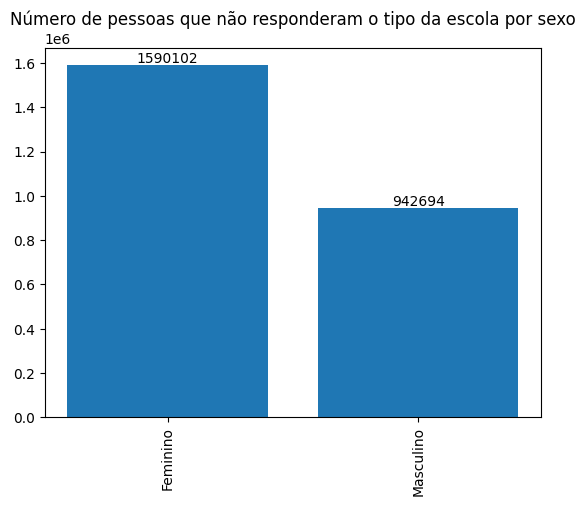

In [87]:
# Plotando o histograma do número de pessoas que não responderam o tipo da escola por sexo
escola_count = [0] * 2
for i in range(2):
    escola_count[i] = microdados[(microdados['TP_ESCOLA'] == 1) & (microdados['TP_SEXO'] == list(sexo.keys())[i])].shape[0]

for i, count in enumerate(escola_count):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.bar(sexo.values(), escola_count)
plt.title('Número de pessoas que não responderam o tipo da escola por sexo')
plt.xticks(rotation=90)
plt.show()

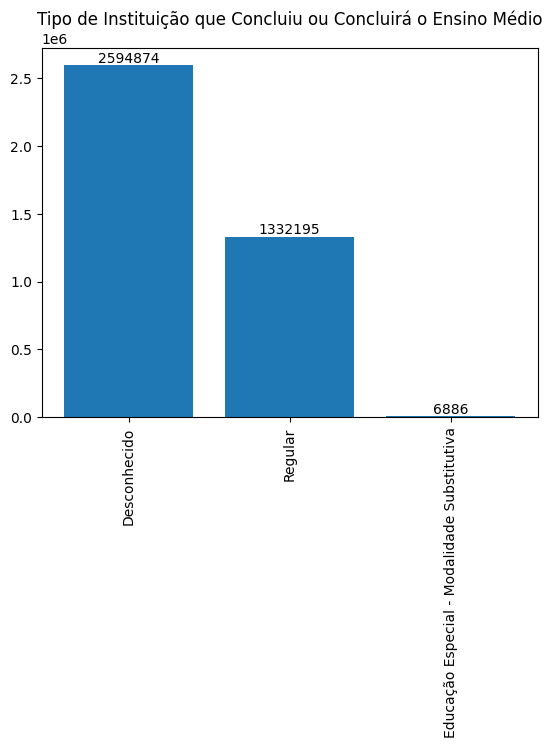

In [88]:
# Plotando histograma para a coluna 'TP_ENSINO'
plot_histograma('TP_ENSINO', ensino, 'Tipo de Instituição que Concluiu ou Concluirá o Ensino Médio')

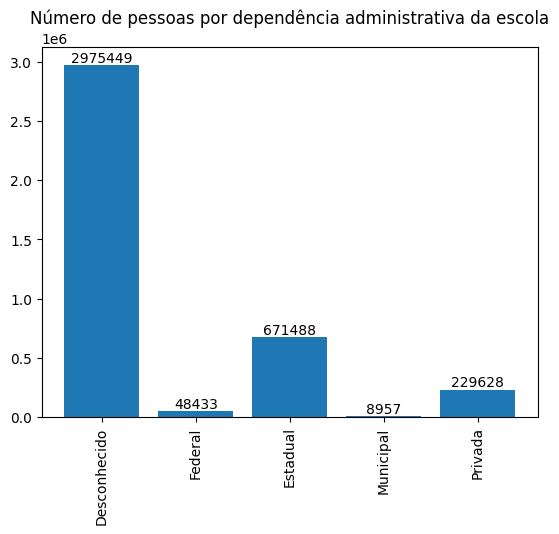

In [ ]:
# Plotando histograma para a coluna 'TP_DEPENDENCIA_ADM_ESC'
plot_histograma('TP_DEPENDENCIA_ADM_ESC', dependencia_adm_esc, 'Número de pessoas por dependência administrativa da escola')

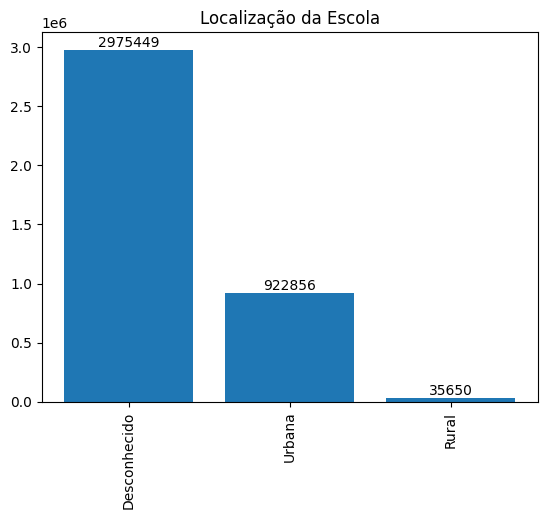

In [90]:
# Plotando histograma para a coluna 'TP_DEPENDENCIA_ADM_ESC'
plot_histograma('TP_LOCALIZACAO_ESC', localizacao_esc, 'Localização da Escola')

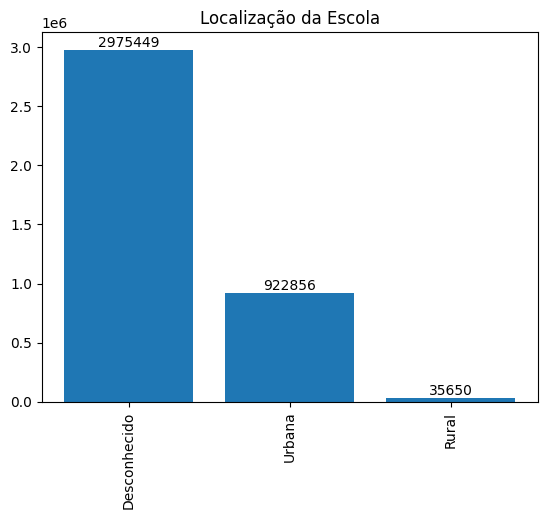

In [91]:
# Plotando histograma para a coluna 'TP_LOCALIZACAO_ESC'
plot_histograma('TP_LOCALIZACAO_ESC', localizacao_esc, 'Localização da Escola')

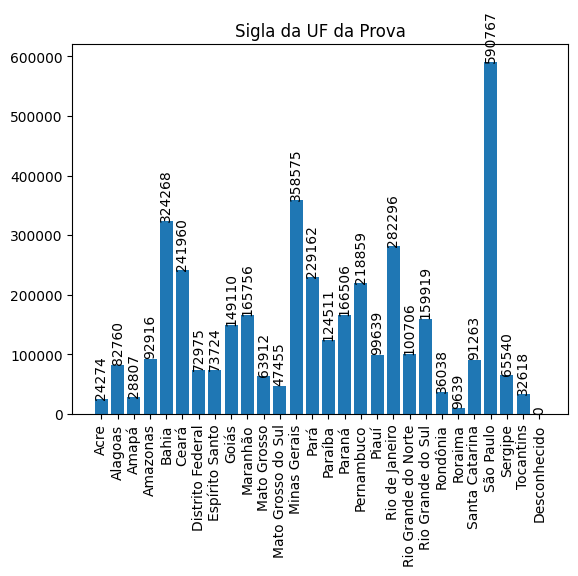

In [93]:
# Plotando histograma para a coluna 'SG_UF_PROVA'
plot_histograma('SG_UF_PROVA', uf_brasil, 'Sigla da UF da Prova', 90)